# Creating Mock Dataframe

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

features = {'Username':None, 'Age-range':None, 'Language':None, 'Fields_of_interest':None, 'Other':None}

mock_df = pd.DataFrame(columns=features)
mock_df

df = pd.read_csv(r'NationalNames.csv')
names = df.Name
usernames = names.apply(lambda x: x+'@gmail.com')

fields_of_interest = """Agriculture/Gardening
Architecture
Childcare
Cooking/Dining
Crafts
Current Affairs
Design/Graphic Arts
Education/Teaching
Engineering/Electronics
Environment/Natural Resources
Film
Finance/Investment
Fine, Visual, Performing Arts
Gaming
Government/Public Sector/Policy
Healthcare/Medicine
History
Hospitality/Tourism
Intelligence/Criminal Justice/Security
Mindfulness
Music
Petcare
Reading/Books
Retail/Shopping
Science
Sports
Tech
Travel
Volunteering
Writing/Publishing/Translation"""

fields_of_interest = fields_of_interest.split('\n')

np.random.choice(fields_of_interest, 5)

age_ranges = ['under 25', '26-35', '36-45', '46-55', '56-65', 'over 65']

language = ['English', 'Russian', 'Hebrew', 'Arabic', 'Spanish', 'French', 'German']

np.random.choice(language, 1)[0]

list_of_interests = ['Dance, Disco, Funk',
       'Folk music', 'Country', 'Classical', 'Musicals', 'Pop', 'Rock',
       'Metal, Hard rock', 'Punk', 'Hip hop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Rock n Roll', 'Alternative music', 'Latin',
       'Techno, Trance', 'Opera', 'I really enjoy watching movies.',
       'Horror movies', 'Thriller movies', 'Comedies', 'Romantic movies',
       'Sci-fi movies', 'War movies', 'Tales', 'Cartoons',
       'Documentaries', 'Western movies', 'Action movies', 'History',
       'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet',
       'PC Software, Hardware', 'Economy, Management', 'Biology',
       'Chemistry', 'Poetry reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art', 'Religion', 'Outdoor activities',
       'Dancing', 'Playing musical instruments', 'Poetry writing',
       'Sport and leisure activities', 'Sport at competitive level',
       'Gardening', 'Celebrity lifestyle', 'Shopping',
       'Science and technology', 'Theatre', 'Socializing',
       'Adrenaline sports', 'Pets', 'Flying', 'Thunder, lightning',
       'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats, mice', 'Ageing',
       'Dangerous dogs', 'Public speaking', 'Smoking habits', 'Drinking',]
list_of_interests = [string.split(' ') for string in list_of_interests]

list_of_interests = [item for sublist in list_of_interests for item in sublist]
len(list_of_interests)

k=np.random.randint(2,8,1)
', '.join(np.random.choice(list_of_interests, k))

usernames.size

listed_interests, free_interests, ages, languages = [], [], [], []
for i in range(usernames.size):
    if i==50000:
        break
    k=np.random.randint(1,7,1)
    other_interests = ', '.join(np.random.choice(list_of_interests, k))
    free_interests.append(other_interests)
    age = np.random.choice(age_ranges, 1)[0]
    ages.append(age)
    lstd_interests = np.random.choice(fields_of_interest, 5)
    listed_interests.append(lstd_interests)
    languages.append(np.random.choice(language))

features['Username']=pd.Series(usernames.values[:50000])
features['Age-range']=pd.Series(ages)
features['Fields_of_interest']=pd.Series(listed_interests)
features['Other']=pd.Series(free_interests)
features['Language']=pd.Series(languages)

df_final = pd.concat([features['Username'], features['Age-range'], features['Language'], features['Fields_of_interest'], features['Other']], axis=1)

# Preprocessing the Data

In [10]:
df2 = pd.DataFrame(columns=list_of_interests, data=np.random.randint(0,2,size=(df_final.size, len(list_of_interests))))
df2=df2[:len(df_final)]
df2

,"Dance,","Disco,",Funk,Folk,music,Country,Classical,Musicals,Pop,Rock,...,"Rats,",mice,Ageing,Dangerous,dogs,Public,speaking,Smoking,habits,Drinking
0,1,1,1,1,0,0,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,1,1,1,0,1,1,1,1,...,1,0,1,1,0,0,1,1,0,1
2,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,1,0,1,1,0,0,1,...,0,0,0,1,1,1,1,1,0,0
4,1,0,0,1,1,1,0,1,0,0,...,0,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,1
49996,0,0,1,0,0,1,1,1,0,0,...,1,1,0,0,1,0,0,0,0,1
49997,1,0,1,1,1,1,0,1,1,0,...,0,1,0,1,1,0,1,0,0,1
49998,1,0,1,0,1,0,1,1,0,1,...,1,1,1,0,1,1,0,1,0,0


In [11]:
df = pd.concat([df_final, df2], axis=1)
df.drop(columns=3, axis=1, inplace=True)
df

,0,1,2,4,"Dance,","Disco,",Funk,Folk,music,Country,...,"Rats,",mice,Ageing,Dangerous,dogs,Public,speaking,Smoking,habits,Drinking
0,Mary@gmail.com,over 65,Russian,"Disco,, Medicine, Outdoor, Techno,, movies., W...",1,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,Anna@gmail.com,over 65,Hebrew,"PC, Rats,, Politics, Religion",0,0,1,1,1,0,...,1,0,1,1,0,0,1,1,0,1
2,Emma@gmail.com,56-65,Russian,"writing, Outdoor, instruments, musical",1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,Elizabeth@gmail.com,over 65,Hebrew,"Playing, Celebrity, Roll, Law, Dangerous",1,0,1,1,0,1,...,0,0,0,1,1,1,1,1,0,0
4,Minnie@gmail.com,under 25,Arabic,"Country, Law, Rap, Punk, movies, Alternative",1,0,0,1,1,1,...,0,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Hessie@gmail.com,26-35,English,"movies, Gardening, Metal,, Socializing, musica...",0,0,1,1,0,0,...,1,0,0,0,1,0,1,1,0,1
49996,Hope@gmail.com,over 65,English,Comedies,0,0,1,0,0,1,...,1,1,0,0,1,0,0,0,0,1
49997,Joe@gmail.com,26-35,Arabic,"Thunder,, movies., Documentaries",1,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
49998,Leonie@gmail.com,under 25,German,"Thriller, Spiders, Horror",1,0,1,0,1,0,...,1,1,1,0,1,1,0,1,0,0


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
documents = df_final[4].tolist()

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

In [15]:
print(vectorizer.get_feature_names())

['action', 'activities', 'adrenaline', 'ageing', 'alternative', 'and', 'art', 'at', 'biology', 'cars', 'cartoons', 'celebrity', 'chemistry', 'classical', 'comedies', 'competitive', 'country', 'dance', 'dancing', 'dangerous', 'darkness', 'disco', 'documentaries', 'dogs', 'drinking', 'economy', 'enjoy', 'fi', 'flying', 'folk', 'foreign', 'funk', 'gardening', 'geography', 'habits', 'hard', 'hardware', 'heights', 'hip', 'history', 'hop', 'horror', 'instruments', 'internet', 'jazz', 'languages', 'latin', 'law', 'leisure', 'level', 'lifestyle', 'lightning', 'management', 'mathematics', 'medicine', 'metal', 'mice', 'movies', 'music', 'musical', 'musicals', 'opera', 'outdoor', 'pc', 'pets', 'physics', 'playing', 'poetry', 'politics', 'pop', 'psychology', 'public', 'punk', 'rap', 'rats', 'reading', 'really', 'reggae', 'religion', 'rock', 'roll', 'romantic', 'sci', 'science', 'shopping', 'ska', 'smoking', 'snakes', 'socializing', 'software', 'speaking', 'spiders', 'sport', 'sports', 'swing', 'ta

In [16]:
X.toarray()

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
df_other=pd.DataFrame(columns=vectorizer.get_feature_names(), data=X.toarray())

In [18]:
df

,0,1,2,4,"Dance,","Disco,",Funk,Folk,music,Country,...,"Rats,",mice,Ageing,Dangerous,dogs,Public,speaking,Smoking,habits,Drinking
0,Mary@gmail.com,over 65,Russian,"Disco,, Medicine, Outdoor, Techno,, movies., W...",1,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,Anna@gmail.com,over 65,Hebrew,"PC, Rats,, Politics, Religion",0,0,1,1,1,0,...,1,0,1,1,0,0,1,1,0,1
2,Emma@gmail.com,56-65,Russian,"writing, Outdoor, instruments, musical",1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,Elizabeth@gmail.com,over 65,Hebrew,"Playing, Celebrity, Roll, Law, Dangerous",1,0,1,1,0,1,...,0,0,0,1,1,1,1,1,0,0
4,Minnie@gmail.com,under 25,Arabic,"Country, Law, Rap, Punk, movies, Alternative",1,0,0,1,1,1,...,0,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Hessie@gmail.com,26-35,English,"movies, Gardening, Metal,, Socializing, musica...",0,0,1,1,0,0,...,1,0,0,0,1,0,1,1,0,1
49996,Hope@gmail.com,over 65,English,Comedies,0,0,1,0,0,1,...,1,1,0,0,1,0,0,0,0,1
49997,Joe@gmail.com,26-35,Arabic,"Thunder,, movies., Documentaries",1,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
49998,Leonie@gmail.com,under 25,German,"Thriller, Spiders, Horror",1,0,1,0,1,0,...,1,1,1,0,1,1,0,1,0,0


In [19]:
df = pd.concat([df, df_other], axis=1)
df.drop(columns=4, axis=1, inplace=True)
df.head()

,0,1,2,"Dance,","Disco,",Funk,Folk,music,Country,Classical,...,techno,technology,theatre,thriller,thunder,trance,war,watching,western,writing
0,Mary@gmail.com,over 65,Russian,1,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,Anna@gmail.com,over 65,Hebrew,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Emma@gmail.com,56-65,Russian,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,Elizabeth@gmail.com,over 65,Hebrew,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Minnie@gmail.com,under 25,Arabic,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df = pd.get_dummies(df, columns=[1,2])

In [24]:
df.drop(columns=0, inplace=True)

# Adding Images to Dataframe

In [71]:
days = np.arange(0,7,1)
groups = np.arange(1,33,1)

In [77]:
df_days = pd.DataFrame(columns=days, data=np.random.choice(groups, size=(len(df_final), len(days))))
df_days

,0,1,2,3,4,5,6
0,5,14,11,1,8,7,8
1,30,9,6,19,12,19,2
2,24,5,7,30,15,28,10
3,2,13,20,1,11,31,4
4,27,31,26,2,1,19,16
...,...,...,...,...,...,...,...
49995,15,28,19,1,29,13,29
49996,31,22,29,27,8,12,30
49997,8,18,7,21,4,20,19
49998,8,10,22,25,16,16,22


In [78]:
df = pd.concat([df, df_days], axis=1)
df

,"Dance,","Disco,",Funk,Folk,music,Country,Classical,Musicals,Pop,Rock,...,2_Hebrew,2_Russian,2_Spanish,0,1,2,3,4,5,6
0,1,1,1,1,0,0,1,1,1,0,...,0,1,0,5,14,11,1,8,7,8
1,0,0,1,1,1,0,1,1,1,1,...,1,0,0,30,9,6,19,12,19,2
2,1,1,1,0,1,1,1,0,1,1,...,0,1,0,24,5,7,30,15,28,10
3,1,0,1,1,0,1,1,0,0,1,...,1,0,0,2,13,20,1,11,31,4
4,1,0,0,1,1,1,0,1,0,0,...,0,0,0,27,31,26,2,1,19,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,1,1,0,0,0,0,1,0,...,0,0,0,15,28,19,1,29,13,29
49996,0,0,1,0,0,1,1,1,0,0,...,0,0,0,31,22,29,27,8,12,30
49997,1,0,1,1,1,1,0,1,1,0,...,0,0,0,8,18,7,21,4,20,19
49998,1,0,1,0,1,0,1,1,0,1,...,0,0,0,8,10,22,25,16,16,22


# Nearest Neighbors Model

In [81]:
from sklearn.neighbors import NearestNeighbors

In [84]:
df_sub = df.sample(1000)
df_sub

,"Dance,","Disco,",Funk,Folk,music,Country,Classical,Musicals,Pop,Rock,...,2_Hebrew,2_Russian,2_Spanish,0,1,2,3,4,5,6
30081,0,1,1,1,1,0,0,0,0,0,...,0,1,0,18,19,19,4,3,24,1
20301,0,1,0,0,0,1,1,1,0,0,...,0,1,0,21,13,7,9,23,12,25
4175,1,0,1,1,0,0,1,1,0,1,...,0,0,0,26,22,12,12,22,26,19
44643,1,0,0,1,1,0,0,1,1,1,...,1,0,0,2,27,32,29,9,7,4
33807,0,0,0,1,0,1,0,0,0,1,...,0,0,0,14,23,8,16,12,18,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36193,0,1,0,0,1,0,1,0,0,1,...,0,1,0,7,18,27,22,25,12,9
377,1,0,1,1,1,1,0,0,0,0,...,0,0,0,9,3,32,29,5,7,14
21558,0,1,0,0,1,1,1,0,0,0,...,0,0,1,11,6,28,13,19,6,27
10628,1,0,1,1,0,1,1,1,1,1,...,0,0,1,25,24,27,26,11,6,16


In [86]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(df_sub)

In [87]:
distances, indices = nbrs.kneighbors(df_sub)

In [88]:
distances

array([[ 0.        , 11.70469991, 12.72792206, ..., 16.03121954,
        17.20465053, 17.72004515],
       [ 0.        , 13.6381817 , 14.69693846, ..., 15.55634919,
        15.8113883 , 15.84297952],
       [ 0.        , 11.83215957, 12.60952021, ..., 14.79864859,
        15.26433752, 15.49193338],
       ...,
       [ 0.        ,  9.94987437, 10.67707825, ..., 15.93737745,
        16.21727474, 16.40121947],
       [ 0.        , 13.37908816, 15.77973384, ..., 16.82260384,
        16.85229955, 17.1464282 ],
       [ 0.        , 12.80624847, 14.07124728, ..., 14.62873884,
        14.93318452, 14.96662955]])

In [89]:
distances[0]

array([ 0.        , 11.70469991, 12.72792206, 13.37908816, 14.79864859,
       15.5241747 , 15.68438714, 16.03121954, 17.20465053, 17.72004515])

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [91]:
X_pca=pca.fit_transform(df_sub)

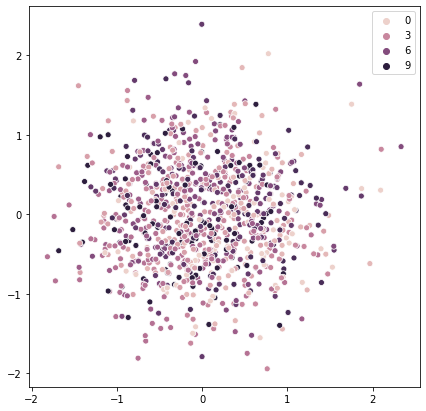

In [53]:
import seaborn as sns
fig = plt.figure(figsize=(7,7))
sns.scatterplot(X_pca[:,0],X_pca[:,1], hue=kmeans.labels_);